# **Cristal Fotónico Unidimensional**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## Método de Matriz de Transferencia para Dispersión

### Definición de las variables a usar
$Q_a$, $Q_b$. Además de los índices de refracción. En este caso $Q_i$ será el producto de $q$ por el ancho de la capa correspondiente

Capa $A$

In [2]:
a = 5
e_a = 8
u_a = 1

Capa $B$

In [3]:
b = 2
e_b = 1
u_b = 1

Ahora, definimos los índices de refracción, en este caso los representamos al cuadrado

In [4]:
n_a2 = e_a * u_a
n_b2 = e_b * u_b

Establecemos las condiciones para la capa $A$, en este caso, $Q$ está premultiplicado por $\frac{a}{2}$

In [5]:
def Q_a(v,theta):
    return (np.pi / 300) * v * (a/2) * np.sqrt(n_a2 - np.sin(theta)**2)

def M_a(v,theta):
    m = np.array([[np.cos(1*Q_a(v,theta)), u_a*a/(2 * Q_a(v,theta)) * np.sin(1 * Q_a(v,theta)) ],
                  [-2 * Q_a(v,theta)/(u_a * a) * np.sin(Q_a(v,theta)) , np.cos(1*Q_a(v,theta))]])
    return m

Ahora las condiciones para la capa $B$

In [6]:
def Q_b(v,theta):
    return (np.pi / 300) * v * np.sqrt(n_b2 - np.sin(theta)**2) * (b/2)

def M_b(v,theta):
    m = np.array([[np.cos(1*Q_b(v,theta)), u_b * b/ (2 * Q_b(v,theta)) * np.sin(1 * Q_b(v,theta)) ],
                  [-2 * Q_b(v,theta)/(u_b * b) * np.sin(Q_b(v,theta)) , np.cos(1*Q_b(v,theta))]])
    return m

Matriz de Transferencia Total

In [7]:
theta = 0
def M_t(v,theta):
    return np.dot(M_b(v,theta), M_a(v,theta))

def MAT(v,theta):
    return np.trace(M_t(v,theta))

def X(v,theta):
    if ((1/2)*MAT(v,theta)) < -1 :
        return 1
    if  ((1/2)*MAT(v,theta)) > 1 :
        return -1
    else:
        return (1/np.pi) * ((np.arccos((1/2)* MAT(v,theta)))).real

Text(0.5, 1.0, 'Matriz de Transferencia: Dispersión - Band Gaps')

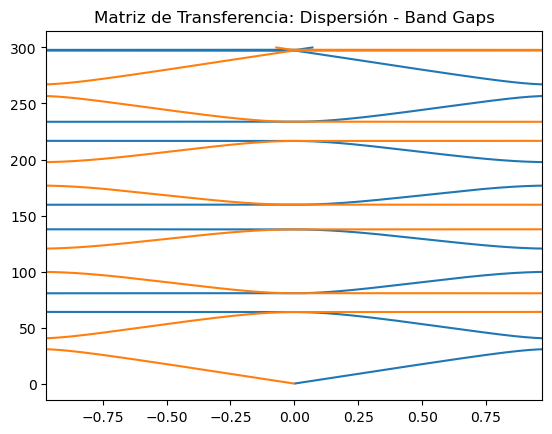

In [8]:
vs = np.arange(0.1,300,0.01)
values = [X(v,theta) for v in vs]
valuesNeg = [-X(v,theta) for v in vs]

plt.plot(values,vs)#,'o',markersize=0.85,color='black')
plt.plot(valuesNeg,vs)#,'o',markersize=0.85,color='black')
plt.xlim(-0.97,0.97)
plt.title('Matriz de Transferencia: Dispersión - Band Gaps')



## Método de Matriz de Transferencia para Transmisión

Definición de las variables que vamos a utilizar. Estas son:
$Q_a$, $Q_b$, $Q_c$ y $Q_d$. En esta caso, cada $Q_i$ será el producto de $q$ por el ancho de la capa correspondiente.


In [9]:
a = 5
e_a = 13
u_a = 1

b = 2
e_b = 1
u_b = 1

na = e_a * u_a
nb = e_b * u_b

In [10]:
def E(theta):
    return np.cos(theta)


Establecemos las condiciones para asignar las matrices que van a quedar para el cálculo de la matriz de transferencia total

(0.0, 1.2)

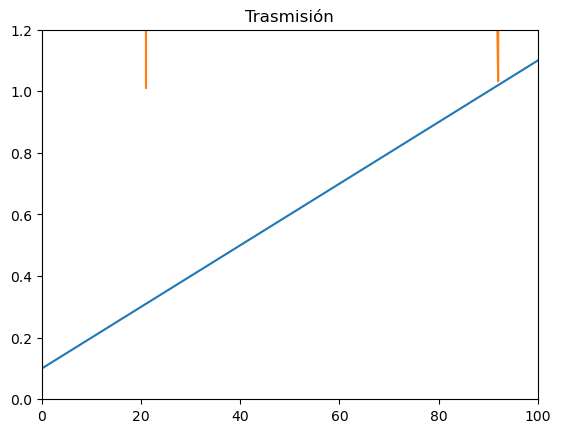

In [12]:
lista3 = []
lista4 = []

out = open('datos_transmision.txt','w')
v = np.arange(0.5,100,0.01)
for i in range(len(v)):
    Maa = M_a(v[i],theta)
    Mbb = M_b(v[i],theta)
    MP = np.dot(Mbb,Maa)
    MT = np.linalg.matrix_power(MP,50)
    Tras = np.abs( (2 * E(theta)) /
                   E(theta) * ((MT[0,0] + MT[1,1]) - MT[1,0] - E(theta)**2 * MT[0,1]))**2
    Refl = np.abs((E(theta) * ((-MT[1,1] + MT[0,0]) + MT[1,0])) - (E(theta)**2 * MT[0,1]) / 
                  (E(theta) * (MT[1,1] + MT[0,0]) - MT[1,0])  - (E(theta)**2 * MT[0,1]))**2 
    #if(Tras <= 1.):
    lista3.append([vs[i],Tras])
    out.write(str(vs[i])+' '+str(Tras)+'\n')
    #if(Refl <= 1.):
    lista4.append(Refl)

out.close()
plt.title('Trasmisión')
plt.plot(lista3)
plt.xlim([0,100])
plt.ylim([0,1.2])

#axis[1].set_title('Reflexión')
#axis[1].plot(lista4)
#axis[1].set_ylim([0,150])
#axis[1].set_xlim([0,100])

In [ ]:
gout = open('datos_transmision.txt','w')

for i in range(len(lista3)):
    gout.write(str(lista3[i])+'\n')

gout.close()

In [ ]:
np.linalg.det(MT)

In [ ]:
print(MP**50)

In [ ]:
print(np.linalg.matrix_power(MP,50))